Importing necessary Libraries

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

Collecting data from yfinance

In [2]:
infosys = yf.Ticker("INFY")
infosys.history(start='2023-01-01', end='2023-12-13',interval="1h", actions=False)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 09:30:00-05:00,18.180000,18.350000,18.120001,18.190001,1463614
2023-01-03 10:30:00-05:00,18.190001,18.250000,18.080000,18.184999,1952537
2023-01-03 11:30:00-05:00,18.184999,18.184999,18.084999,18.084999,923223
2023-01-03 12:30:00-05:00,18.084999,18.139999,18.055000,18.115000,673909
2023-01-03 13:30:00-05:00,18.110001,18.168501,18.100000,18.125000,706965
...,...,...,...,...,...
2023-12-12 11:30:00-05:00,17.500000,17.500000,17.480000,17.495001,241934
2023-12-12 12:30:00-05:00,17.490000,17.510000,17.485001,17.495001,328332
2023-12-12 13:30:00-05:00,17.500000,17.530001,17.495001,17.525000,660845


In [94]:
## EDA 
df=infosys.history(start='2023-01-01', end='2023-12-13',interval="1h", actions=False)
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print("number of null values in each column", df.isnull().sum())
print("number of NaN values in each column", df.isna().sum())

(1658, 5)
                                Open       High        Low      Close   Volume
Datetime                                                                      
2023-01-03 09:30:00-05:00  18.180000  18.350000  18.120001  18.190001  1463614
2023-01-03 10:30:00-05:00  18.190001  18.250000  18.080000  18.184999  1952537
2023-01-03 11:30:00-05:00  18.184999  18.184999  18.084999  18.084999   923223
2023-01-03 12:30:00-05:00  18.084999  18.139999  18.055000  18.115000   673909
2023-01-03 13:30:00-05:00  18.110001  18.168501  18.100000  18.125000   706965
                                Open       High        Low      Close   Volume
Datetime                                                                      
2023-12-12 11:30:00-05:00  17.500000  17.500000  17.480000  17.495001   241934
2023-12-12 12:30:00-05:00  17.490000  17.510000  17.485001  17.495001   328332
2023-12-12 13:30:00-05:00  17.500000  17.530001  17.495001  17.525000   660845
2023-12-12 14:30:00-05:00  17.530001  17.5

In [4]:
df.to_csv("infosys.csv", index=True, index_label="Datetime")


In [84]:
df.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 09:30:00-05:00,18.180000,18.350000,18.120001,18.190001,1463614
2023-01-03 10:30:00-05:00,18.190001,18.250000,18.080000,18.184999,1952537
2023-01-03 11:30:00-05:00,18.184999,18.184999,18.084999,18.084999,923223
2023-01-03 12:30:00-05:00,18.084999,18.139999,18.055000,18.115000,673909
2023-01-03 13:30:00-05:00,18.110001,18.168501,18.100000,18.125000,706965


In [5]:
# taking only the close column
data = df[['Close']]
print(data.head())

                               Close
Datetime                            
2023-01-03 09:30:00-05:00  18.190001
2023-01-03 10:30:00-05:00  18.184999
2023-01-03 11:30:00-05:00  18.084999
2023-01-03 12:30:00-05:00  18.115000
2023-01-03 13:30:00-05:00  18.125000


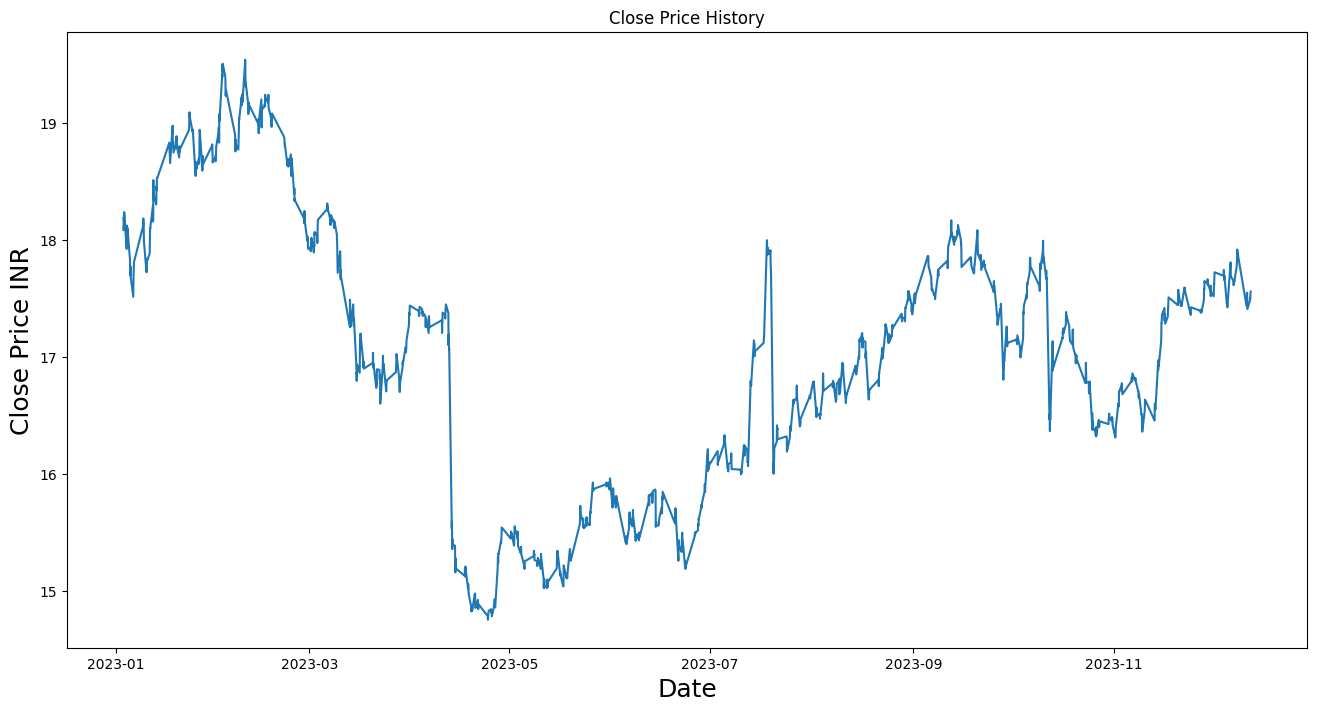

In [6]:
# plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [8]:
class DataLoader():
   

    def __init__(self, filename,cols):
        dataframe = pd.read_csv(filename)
        self.data_train = dataframe.get(cols).values
        self.len_train  = len(self.data_train)
        self.len_train_windows = None

    def get_data(self, seq_len, normalise):
        '''
        Create x, y train data windows
        Warning: batch method, not generative, make sure you have enough memory to
        load data, otherwise use generate_training_window() method.
        '''
        data_x = []
        data_y = []
        for i in range(self.len_train - seq_len):
            x, y = self._next_window(i, seq_len, normalise)
            data_x.append(x)
            data_y.append(y)
        return np.array(data_x), np.array(data_y)

    def generate_train_batch(self, seq_len, batch_size, normalise):
        '''Yield a generator of training data from filename on given list of cols split for train/test'''
        i = 0
        while i < (self.len_train - seq_len):
            x_batch = []
            y_batch = []
            for b in range(batch_size):
                if i >= (self.len_train - seq_len):
                    # stop-condition for a smaller final batch if data doesn't divide evenly
                    yield np.array(x_batch), np.array(y_batch)
                    i = 0
                x, y = self._next_window(i, seq_len, normalise)
                x_batch.append(x)
                y_batch.append(y)
                i += 1
            yield np.array(x_batch), np.array(y_batch)

    def _next_window(self, i, seq_len, normalise):
        '''Generates the next data window from the given index location i'''
        window = self.data_train[i:i+seq_len]
        window = self.normalise_windows(window, single_window=True)[0] if normalise else window
        x = window[:-1]
        y = window[-1, [0]]
        return x, y

    def normalise_windows(self, window_data, single_window=False):
        '''Normalise window with a base value of zero'''
        normalised_data = []
        window_data = [window_data] if single_window else window_data
        for window in window_data:
            normalised_window = []
            for col_i in range(window.shape[1]):
                normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
                normalised_window.append(normalised_col)
            normalised_window = np.array(normalised_window).T # reshape and transpose array back into original multidimensional format
            normalised_data.append(normalised_window)
        return np.array(normalised_data)

In [9]:
data = DataLoader(
        "infosys.csv",
        ["Close","Volume"]
    )

x, y = data.get_data(
        seq_len=20,
        normalise=True
    )

In [10]:
x_train = x[:-170]
x_test = x[-170:]
y_train = y[:-170]
y_test = y[-170:]

In [11]:
from attention import Attention
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, LSTM,Bidirectional
from numpy import newaxis

model = Sequential([
      Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),              
      #LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=10,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      #Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=39,
              batch_size=32)




Epoch 1/39

46/46 [==============================] - 9s 25ms/step - loss: 0.0021
Epoch 2/39
46/46 [==============================] - 1s 25ms/step - loss: 6.5573e-04
Epoch 3/39
46/46 [==============================] - 1s 25ms/step - loss: 5.1558e-04
Epoch 4/39
46/46 [==============================] - 1s 24ms/step - loss: 4.1132e-04
Epoch 5/39
46/46 [==============================] - 1s 25ms/step - loss: 3.5711e-04
Epoch 6/39
46/46 [==============================] - 1s 25ms/step - loss: 3.8535e-04
Epoch 7/39
46/46 [==============================] - 1s 25ms/step - loss: 3.1224e-04
Epoch 8/39
46/46 [==============================] - 1s 25ms/step - loss: 2.9520e-04
Epoch 9/39
46/46 [==============================] - 1s 26ms/step - loss: 2.9700e-04
Epoch 10/39
46/46 [==============================] - 1s 27ms/step - loss: 2.7023e-04
Epoch 11/39
46/46 [==============================] - 1s 30ms/step - loss: 2.5508e-04
Epoch 12/39
46/46 [==============================] - 1s 30ms/step - loss: 

In [12]:
from attention import Attention
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, LSTM,Bidirectional
from numpy import newaxis

model = Sequential([
      #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),              
      LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=10,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=7,
              batch_size=32)

Epoch 1/7
46/46 [==============================] - 7s 26ms/step - loss: 8.0990e-04
Epoch 2/7
46/46 [==============================] - 1s 24ms/step - loss: 5.1682e-04
Epoch 3/7
46/46 [==============================] - 1s 25ms/step - loss: 3.5335e-04
Epoch 4/7
46/46 [==============================] - 1s 25ms/step - loss: 2.9909e-04
Epoch 5/7
46/46 [==============================] - 1s 25ms/step - loss: 2.5788e-04
Epoch 6/7
46/46 [==============================] - 1s 27ms/step - loss: 2.3536e-04
Epoch 7/7
46/46 [==============================] - 1s 25ms/step - loss: 1.9910e-04


In [13]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [14]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

visualistion

In [15]:
import lstm
import time
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


In [16]:
predicted = predict_point_by_point(model, x)

52/52 [==============================] - 2s 9ms/step


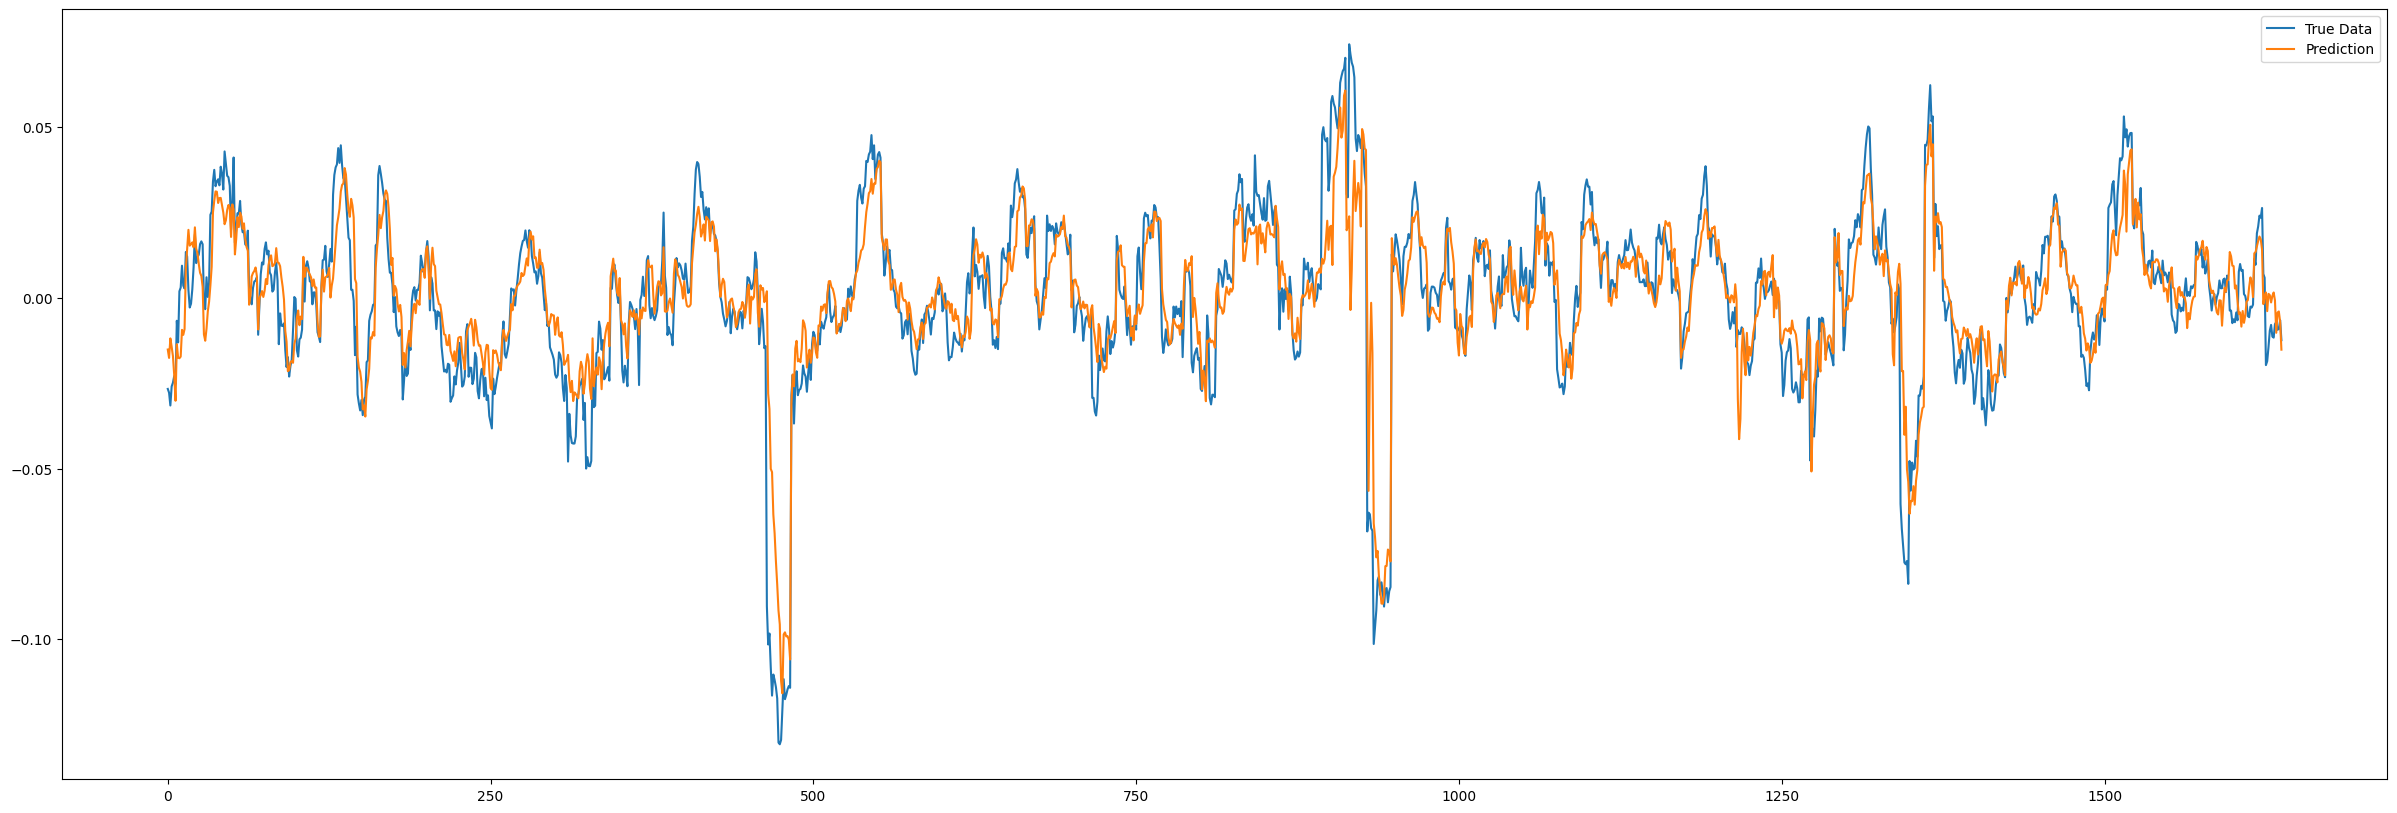

In [17]:
plt.rcParams["figure.figsize"] = [30,10]
plot_results(predicted, y)

In [18]:

model = Sequential([
      #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),              
      LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=70,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=1,
              batch_size=6)
predictions = predict_sequences_multiple(model,x_test,12, 10)

1/1 [==============================] - 0s 32ms/step


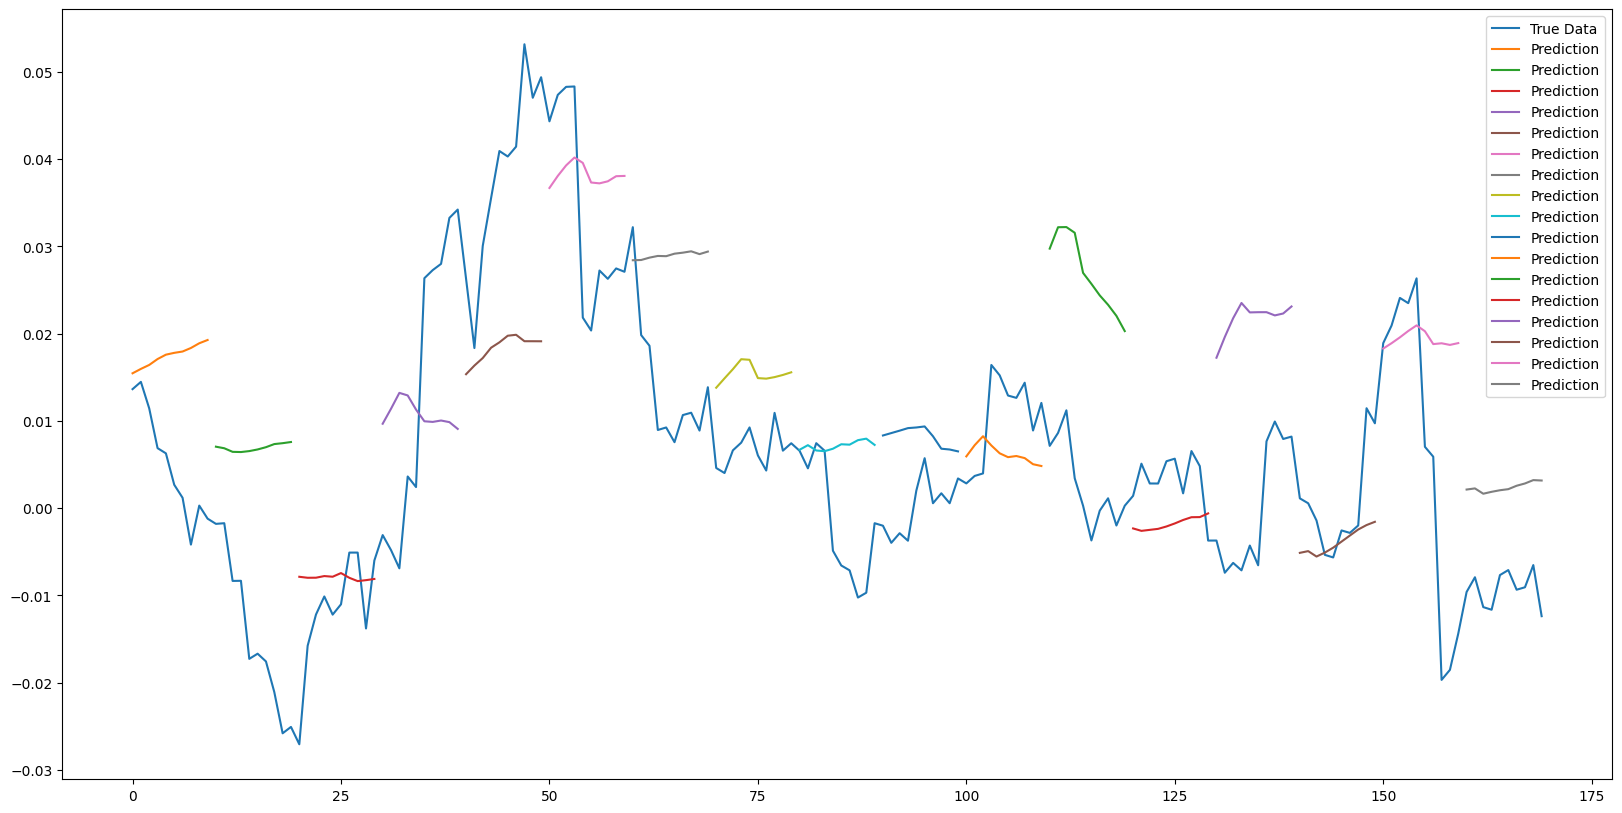

In [19]:
plt.rcParams["figure.figsize"] = [20,10]
plot_results_multiple(predictions, y_test,10)

trading stratedy with point by point

In [119]:
from backtesting import Strategy
from backtesting.lib import crossover
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from attention import Attention

def mean(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()
    
class LstmPredictStrategy(Strategy):
    n1=1
    def init(self):
        # Define any required variables or parameters here
        self.seq_len = 20
        self.window_size = 19
        self.prediction_len = 1 
        ;# Changed to predict 1 point at a time
        self.model = self.build_model()
        self.x = self.I(mean, self.data.Close, self.n1)
    
    def build_model(self):
        # Define your LSTM model here
        model = Sequential([
            LSTM(units=100, input_shape=(self.window_size, 2), return_sequences=True),
            Dropout(0.2),
            LSTM(units=10, return_sequences=True),
            Dropout(0.2),
            Attention(),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model
     def train_model(self):
      
        
        # Train the model
        self.model.fit(self.data.Close, , epochs=7, batch_size=32, verbose=0)

    def next(self):
        # Define the logic for making trading decisions
         # Precompute the two moving averages
     
        prediction = self.predict_point_by_point(x)
        if prediction > 0:  # Assuming the prediction is the next price change
            self.buy()
        elif prediction < 0:
            self.sell()

    def predict_point_by_point(self, data):
        #Predict the next timestep given the last sequence of true data
        predicted = self.model.predict(data)
        predicted = np.reshape(predicted, (predicted.size,))
        return predicted[-1]  # Return the last prediction for the next timestep


In [123]:

bt = Backtest(df, LstmPredictStrategy, cash=10_000, commission=.002) 
stats = bt.run()

stats


52/52 [==============================] - 1s 9ms/step


Start                     2023-01-03 09:30...
End                       2023-12-12 15:30...
Duration                    343 days 06:00:00
Exposure Time [%]                   99.879373
Equity Final [$]                  9618.359071
Equity Peak [$]                  10725.349575
Return [%]                          -3.816409
Buy & Hold Return [%]               -3.463447
Return (Ann.) [%]                    -4.13994
Volatility (Ann.) [%]                23.77932
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -24.499528
Avg. Drawdown [%]                   -3.385446
Max. Drawdown Duration      306 days 04:00:00
Avg. Drawdown Duration       28 days 15:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                      -3.657075
Worst Trade [%]                     -3.657075
Avg. Trade [%]                    

In [124]:
bt.plot()

C:\Users\rishi\anaconda3\envs\my-conda-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\rishi\anaconda3\envs\my-conda-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\rishi\anaconda3\envs\my-conda-env\Lib\site-packages\backtesting\_plotting.py:456: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(resample_rule, label='left')
C:\Users\rishi\AppData\Local\Temp\ipykernel_5980\651457420.py:1: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  bt.plot()
C:\Users\rishi\anaconda3\envs\my-conda-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found 

GridPlot(id='p1293', ...)

Trading Strategy with multiple point 

In [81]:
import numpy as np
import pandas as pd
from typing import Union

_Array = Union[np.ndarray, pd.Series]

class _Data:
    def __init__(self, df):
        self.df = df
        self.__arrays = {c: df[c].values for c in df.columns}
        self.__i = len(df)
        self.__cache = {}
    
    def __getitem__(self, item):
        return self.__get_array(item)
        
    def __get_array(self, key) -> _Array:
      if isinstance(key, slice):
        start, stop, step = key.start, key.stop, key.step
        if start is None:
            start = 0
        if stop is None:
            stop = len(self.__arrays)
        if step is None:
            step = 1
        return np.concatenate([self.__arrays[i] for i in range(start, stop, step)])

      if key not in self.__arrays:
        raise KeyError(f"Column '{key}' not found in data")

      arr = self.__cache.get(key)
      if arr is None:
        arr = cast(_Array, self.__arrays[key][:self.__i])
        self.__cache[key] = arr
      return arr




In [111]:
from backtesting import Strategy
from backtesting.lib import crossover
import pandas as pd

class LstmPredictStrategy(Strategy):
    def init(self):
        # Define any required variables or parameters here
        self.seq_len = 20
        self.window_size = 19
        self.prediction_len = 12
        self.model = self.build_model()
        self.train_model()

    def build_model(self):
        # Define your LSTM model here
        model = Sequential([
            LSTM(units=100, input_shape=(self.window_size, 2), return_sequences=True),
            Dropout(0.2),
            LSTM(units=70, return_sequences=True),
            Dropout(0.2),
            Attention(),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model
    
    def train_model(self):
        # Train your model here
        
        x, y = self.get_data()
        x_train = x[:-170]
        x_test = x[-170:]
        y_train = y[:-170]
        y_test = y[-170:]
        self.model.fit(x_train, y_train, epochs=1, batch_size=6)

    def get_data(self):
        # Prepare your data for training here
        data_x = []
        data_y = []
        for i in range(len(self.data) - self.seq_len):
            x, y = self._next_window(i)
            data_x.append(x)
            data_y.append(y)
        return np.array(data_x), np.array(data_y)

    def _next_window(self, i):
    # Define how each window of data is processed
       # window = self.data.iloc[i:i+self.seq_len].values.tolist()
        self.data.drop(self, labels='Datetime', axis=1,inplace=True)

        window = self.data[i:i+self.seq_len].values.tolist()
        window = self.normalise_windows(window, single_window=True)[0]
        x = window[:-1]
        y = window[-1][0]  # Assuming you want the first column value as y
        return x, y




    def normalise_windows(self, window_data, single_window=False):
        # Define how data is normalised
        normalised_data = []
        window_data = [window_data] if single_window else window_data
        for window in window_data:
            normalised_window = []
            for col_i in range(window.shape[1]):
                normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
                normalised_window.append(normalised_col)
            normalised_window = np.array(normalised_window).T
            normalised_data.append(normalised_window)
        return np.array(normalised_data)

    def next(self):
        # Define the logic for making trading decisions
        x = self.data[-self.seq_len:]
        prediction = self.predict_sequences_multiple(x)
        if prediction[-1][-1] > 0:  # Assuming the last prediction in the sequence is the future prediction
            self.buy()
        elif prediction[-1][-1] < 0:
            self.sell()

    def predict_sequences_multiple(self, data):
        # Define how predictions are made
        prediction_seqs = []
        for i in range(int(len(data) / self.prediction_len)):
            curr_frame = data[i * self.prediction_len]
            predicted = []
            for j in range(self.prediction_len):
                predicted.append(self.model.predict(curr_frame[np.newaxis, :, :])[0, 0])
                curr_frame = curr_frame[1:]
                curr_frame = np.insert(curr_frame, [self.window_size - 1], predicted[-1], axis=0)
            prediction_seqs.append(predicted)
        return prediction_seqs


In [ ]:
from backtesting import Backtest

bt = Backtest(df, LstmPredictStrategy, cash=10_000, commission=.002)
stats = bt.run()
stats

backtesting for infosys :

In [128]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, META


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(META, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()
stats


ImportError: cannot import name 'META' from 'backtesting.test' (C:\Users\rishi\anaconda3\envs\my-conda-env\Lib\site-packages\backtesting\test\__init__.py)